In [1]:
from typing import List
import pandas as pd 
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import string
import time

from typing import List 
import random 
import glob 
from nltk import tokenize, download

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelBinarizer

import keras
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, Embedding
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import concatenate
from keras.optimizers import Adam
from keras.preprocessing.text import one_hot
from keras.callbacks import ModelCheckpoint 

from scipy import stats

In [2]:
download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
def split_text(filepath: str, min_char: int = 5)-> List[str]: 
    
    text = str()
    with open(filepath, 'r', encoding='utf8') as file: 
        text = file.read().replace('\n', '. ')
        text = text.replace('.”', '”.').replace('."', '".').replace('?”', '”?').replace('!”', '”!')
        text = text.replace('--', ' ').replace('. . .', '').replace('_', '') 
        
    sentences = tokenize.sent_tokenize(text) 
    sentences = [sentence for sentence in sentences if len(sentence) >= min_char] 
    
    return list(sentences)

In [4]:
# path to the files 

poem_1 = [] 
for path in glob.glob('../input/poemsdataset/topics/water/WaterPoemsSummerWaterHaikuWithRhymePoembyPeterSQuinn.txt'):
    poem_1 += split_text(path)

poem_2 = []
for path in glob.glob('../input/poemsdataset/topics/water/WaterPoemsWaterSteamAndIceCoupletsEditedPoembyDeboraShort.txt'):
    poem_2 += split_text(path)
    
    
poem_3 = []
for path in glob.glob('../input/poemsdataset/topics/peace/PeacePoemsPeaceNotPermanentPoembyRobertHerrick.txt'):
    poem_3 += split_text(path)


poem_4 = []
for path in glob.glob('../input/poemsdataset/topics/spring/SpringPoemsAskNotTheCauseWhySullenSpringPoembyJohnDryden.txt'):
    poem_4 += split_text(path)


poem_5 = []
for path in glob.glob('../input/poemsdataset/topics/spring/SpringPoemsSpringNightPoembySaraTeasdale.txt'):
    poem_5 += split_text(path)


poem_6 = []
for path in glob.glob('../input/poemsdataset/topics/memory/MemoryPoemsMemoryLanePoembyErnestineNorthover.txt'):
    poem_6 += split_text(path)

poem_7 = []
for path in glob.glob('../input/poemsdataset/topics/memory/MemoryPoemsMemoryFailsMePoembyDónallDempsey.txt'):
    poem_7 += split_text(path)

poem_8 = []
for path in glob.glob('../input/poemsdataset/topics/memory/MemoryPoemsInMemoryOfMBPoembyAnnaAkhmatova.txt'):
    poem_8 += split_text(path)
    
poem_9 = []
for path in glob.glob('../input/poemsdataset/forms/anaphora/AnaphoraPoemsTheAllPowerfulAnaphoraPoembyMuzahidulReza.txt'):
    poem_9 += split_text(path)
    
    
poem_10 = []
for path in glob.glob('../input/poemsdataset/topics/spring/SpringPoemsSpringIsSprungPoembyAlisonCassidy.txt'):
    poem_10 += split_text(path)
    



In [5]:
text_dictionary = {'SpringIsSprung': poem_10 , 'PowerfulAnaphoraPoem': poem_9 , 'InMemoryOfMBPoem': poem_8 , 'MemoryFailsMePoem': poem_7 , 'MemoryLanePoem': poem_6, 'SpringNightPoem': poem_5 , 'AskNotTheCauseWhySullenSpringPoem':poem_4 , 'NotPermanentPoem': poem_3 , 'WaterSteamAndIceCoupletsEditedPoem': poem_2 , 'WaterHaikuWithRhymePoem': poem_1  }

for key in text_dictionary.keys():
    print(key, ':', len(text_dictionary[key]), 'sentences')
    

SpringIsSprung : 15 sentences
PowerfulAnaphoraPoem : 15 sentences
InMemoryOfMBPoem : 13 sentences
MemoryFailsMePoem : 23 sentences
MemoryLanePoem : 9 sentences
SpringNightPoem : 21 sentences
AskNotTheCauseWhySullenSpringPoem : 23 sentences
NotPermanentPoem : 2 sentences
WaterSteamAndIceCoupletsEditedPoem : 22 sentences
WaterHaikuWithRhymePoem : 3 sentences


In [6]:
# combining the sentences 
np.random.seed(1) 

max_len = 50 

names = [poem_10, poem_9, poem_8, poem_7, poem_6, poem_5, poem_4 , poem_3, poem_2 , poem_1] 

combined = []

for name in names: 
    name = np.random.choice(name, max_len, replace = True) 
    combined += list(name) 
    
print('Length of combo and internally shuffed list:' , len(combined))    
    

Length of combo and internally shuffed list: 500


In [7]:
# creating a marked list '
labels = ['AlisonCassidy'] * max_len + ['MuzahidulReza'] * max_len + ['AnnaAkhmatova'] * max_len + ['DónallDempsey'] * max_len + ['ErnestineNorthover'] * max_len + ['SaraTeasdale'] * max_len + ['JohnDryden'] * max_len + ['RobertHerrick'] * max_len + ['DeboraShort'] * max_len + ['PeterSQuinn'] * max_len 

print('Length of the marked list:' , len(labels))

Length of the marked list: 500


In [8]:
len(combined) == len(labels)

True

In [9]:
# shuffeling the data 
random.seed(3) 

zipped = list(zip(combined, labels)) 

random.shuffle(zipped)

combined, labels = zip(*zipped)

In [10]:
# converting this to a dataset 
output_data = pd.DataFrame()
output_data['Poem'] = combined
output_data['author'] = labels 


In [11]:
print(output_data.head())
print(output_data.tail())

                                                Poem         author
0                                    Space and Time.  DónallDempsey
1              hiding the tremor of his mortal pain.  AnnaAkhmatova
2                    O, Beauty, are you not enough?.   SaraTeasdale
3  ......................... .... ..................  MuzahidulReza
4            Magical crystals spun during the night.    DeboraShort
                                                  Poem         author
495                               and tried to create.  DónallDempsey
496                                    The All-mighty!  MuzahidulReza
497   Glimmer and shake.. Oh, is it not enought to be.   SaraTeasdale
498  To be the victim for mankind.Credits and Copyr...     JohnDryden
499  at your dumb funeral feast.. Oh, who would hav...  AnnaAkhmatova


In [12]:
# converting to csv file 
output_data.to_csv('peom_data.csv', index=False)

In [13]:
# pre-processing 

import time 
import nltk 
import string 
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt 
from nltk.stem.porter import PorterStemmer

In [14]:
data = pd.read_csv('peom_data.csv', encoding='utf8')
print(data.head())

                                                Poem         author
0                                    Space and Time.  DónallDempsey
1              hiding the tremor of his mortal pain.  AnnaAkhmatova
2                    O, Beauty, are you not enough?.   SaraTeasdale
3  ......................... .... ..................  MuzahidulReza
4            Magical crystals spun during the night.    DeboraShort


In [15]:
poems = list(data['Poem'].values)

author = list(data['author'].values) 
              
print('Dataset contains {} notes'.format(len(poems)))

Dataset contains 500 notes


In [16]:
# samples verses 
np.random.seed(73)
n = len(poems) 

for _ in range(5): 
    print(poems[np.random.randint(0 , n)])

He is The Merciful Who acts with extreme kindness.
So let it now take you, down memory lane.. ©   Ernestine Northover
I, smoldering on a slow fire,.
and stayed with her alone.. Now you're gone, and nobody says a word.
That cools that sweet tea you sip on our porch.


In [17]:
word_count = np.array([len(sent.split()) for sent in poems])
char_count = np.array([len(sent) for sent in poems])
average_length = char_count/word_count

In [18]:
def get_stats(var): 
    print('\t Min: ', np.min(var))
    print('t Max: ', np.max(var))
    print('\t Average: ', np.mean(var))
    print('\t Aaverage: ', np.median(var))
    print('\t Percentile 1%: ', np.percentile(var ,1))
    print('\t Percentile 95%: ', np.percentile(var, 95))
    print('\t Percentile 99%: ', np.percentile(var, 99))
    print('\t Percentile 99.5%: ', np.percentile(var, 99.5))
    print('\t Percentile 99.9%: ', np.percentile(var, 99.9))
                

In [19]:
print('Word count statistics: ')
get_stats(word_count)

Word count statistics: 
	 Min:  1
t Max:  50
	 Average:  7.068
	 Aaverage:  7.0
	 Percentile 1%:  2.0
	 Percentile 95%:  13.0
	 Percentile 99%:  23.0
	 Percentile 99.5%:  50.0
	 Percentile 99.9%:  50.0


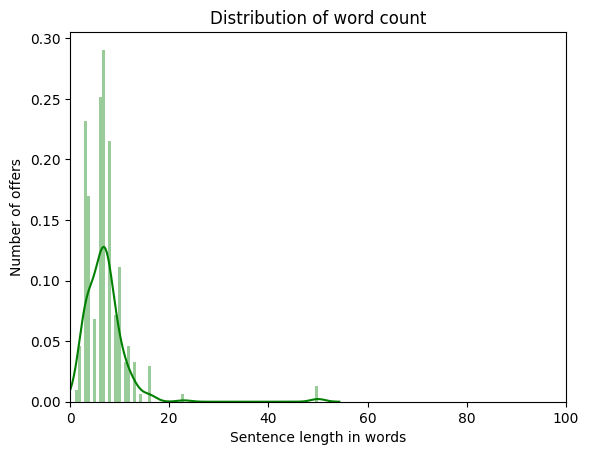

In [20]:
import warnings
warnings.filterwarnings("ignore") 

sns.distplot(word_count, kde=True, bins=80, color='green').set_title('Distribution of word count')
plt.xlabel('Sentence length in words')
plt.ylabel('Number of offers')
plt.xlim(0, 100)
plt.savefig('word_count.png');

In [21]:
# character count  
print('Character count statistics:')
get_stats(char_count)

Character count statistics:
	 Min:  6
t Max:  387
	 Average:  40.146
	 Aaverage:  36.0
	 Percentile 1%:  7.0
	 Percentile 95%:  71.04999999999995
	 Percentile 99%:  124.0
	 Percentile 99.5%:  387.0
	 Percentile 99.9%:  387.0


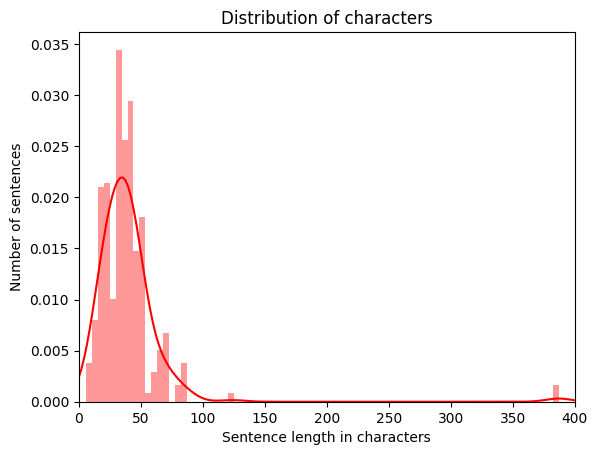

In [22]:
sns.distplot(char_count, kde=True, bins=80, color='red').set_title('Distribution of characters')
plt.xlabel('Sentence length in characters')
plt.ylabel('Number of sentences')
plt.xlim(0, 400)
plt.savefig('char_count.png')

In [23]:
print('Average length statistics:')
get_stats(average_length)

Average length statistics:
	 Min:  3.5
t Max:  10.666666666666666
	 Average:  5.689450585356672
	 Aaverage:  5.428571428571429
	 Percentile 1%:  3.5
	 Percentile 95%:  7.5
	 Percentile 99%:  9.0
	 Percentile 99.5%:  9.428571428571429
	 Percentile 99.9%:  10.048857142857184


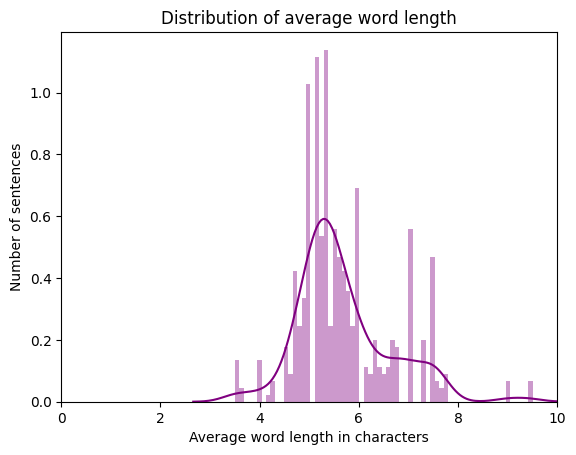

In [24]:
sns.distplot(average_length, kde=True, bins=80, color='purple').set_title('Distribution of average word length')
plt.xlabel('Average word length in characters')
plt.ylabel('Number of sentences')
plt.xlim(0, 10)
plt.savefig('ave_length.png')

In [25]:
# finding the outlier in the text 
word_outliers = np.where(word_count > 5)

for i in word_outliers[0][:5]:
    print('Author: {}, Sentence length: {}'.format(author[i], word_count[i]))
    print(poems[i], '\n') 
    

Author: AnnaAkhmatova, Sentence length: 7
hiding the tremor of his mortal pain. 

Author: SaraTeasdale, Sentence length: 6
O, Beauty, are you not enough?. 

Author: MuzahidulReza, Sentence length: 7
......................... .... ....................> will go on >. 

Author: DeboraShort, Sentence length: 6
Magical crystals spun during the night. 

Author: DeboraShort, Sentence length: 8
I am that drink your ravenous soul desires. 



In [26]:
authors = Counter(author)
authors 

Counter({'DónallDempsey': 50,
         'AnnaAkhmatova': 50,
         'SaraTeasdale': 50,
         'MuzahidulReza': 50,
         'DeboraShort': 50,
         'PeterSQuinn': 50,
         'JohnDryden': 50,
         'AlisonCassidy': 50,
         'RobertHerrick': 50,
         'ErnestineNorthover': 50})

In [27]:
author_names = list(authors.keys())
author_names

['DónallDempsey',
 'AnnaAkhmatova',
 'SaraTeasdale',
 'MuzahidulReza',
 'DeboraShort',
 'PeterSQuinn',
 'JohnDryden',
 'AlisonCassidy',
 'RobertHerrick',
 'ErnestineNorthover']

In [28]:
max_authors = {author : 0 for author in author_names} 

for i in word_outliers[0]: 
    max_authors[author[i]] += 1
    
Counter(max_authors)    
    

Counter({'AnnaAkhmatova': 50,
         'RobertHerrick': 50,
         'ErnestineNorthover': 50,
         'SaraTeasdale': 47,
         'JohnDryden': 46,
         'DeboraShort': 45,
         'MuzahidulReza': 33,
         'AlisonCassidy': 14,
         'DónallDempsey': 4,
         'PeterSQuinn': 0})

In [29]:
# very short sentences 
word_outliers = np.where(word_count < 2) 

for i in word_outliers[0][:10]: 
    print('Sentence length: {}'.format(word_count[i]))
    print(poems[i], '\n')
    

Sentence length: 1
apart. 

Sentence length: 1
apart. 

Sentence length: 1
apart. 



In [30]:
# finding the uncommon symbols 
# this shows the number of each characters 
text_string = ''
for sents in poems: 
    text_string += sents.lower() 
    
char_cnt = Counter(text_string) 
print(char_cnt)
print(len(char_cnt), 'unusual symbols in data.')

Counter({' ': 3050, 'e': 2021, 't': 1337, 'i': 1201, 'o': 1182, 'n': 1170, 'a': 1117, 'r': 1097, 's': 988, 'h': 844, '.': 708, 'd': 640, 'l': 618, 'm': 560, 'g': 453, 'f': 427, 'u': 380, 'y': 372, 'w': 352, 'c': 306, ',': 268, 'v': 186, 'p': 181, 'b': 159, 'k': 119, "'": 71, ';': 34, '-': 29, ')': 24, '?': 23, '(': 21, ':': 20, 'z': 18, '"': 16, 'j': 14, 'x': 13, '©': 10, 'q': 7, '!': 7, '>': 6, '2': 6, '’': 5, '7': 4, '0': 4, '|': 2, '1': 2, '6': 1})
47 unusual symbols in data.


In [31]:
# all the characters used 
print(list(char_cnt.keys()))

['s', 'p', 'a', 'c', 'e', ' ', 'n', 'd', 't', 'i', 'm', '.', 'h', 'g', 'r', 'o', 'f', 'l', ',', 'b', 'u', 'y', '?', '>', 'w', 'k', 'v', 'x', '"', "'", ';', '-', 'q', '’', ':', 'j', ')', '!', '(', '©', 'z', '|', '2', '7', '0', '1', '6']


In [32]:
# which sentences have unusual symbols? 
accented_chars = ['f', 'u', 'r', 's', 'i', 'c', 'h', '́', 'n', 'd', 'p', 'e', 'a', 't', 'o', 'l', 'x', 'm', 'j', 'é', 'ô', 'v', 'q', 'ê', 'g', 'b', 'k', 'y', 'à', 'і', 'z', 'w', 'è', 'ó', 'ö', '°', 'ç', 'ï', 'á', 'ü', 'ù', 'û', 'î', 'ѣ', 'â'] 

accented_text = []
for i in range(len(poems)): 
    for j in poems[i]: 
        if j in accented_chars: 
            accented_text.append(i) 
            
accented_text = list(set(accented_text))          

print(len(accented_text), 'sentences contains unusual symbols.')


500 sentences contains unusual symbols.


In [33]:
# print some sentence with unusual symbols 

for i in accented_text[:10]: 
    print('Sentence number {}: '.format(i))
    print(poems[i], '\n')
    

Sentence number 0: 
Space and Time. 

Sentence number 1: 
hiding the tremor of his mortal pain. 

Sentence number 2: 
O, Beauty, are you not enough?. 

Sentence number 3: 
......................... .... ....................> will go on >. 

Sentence number 4: 
Magical crystals spun during the night. 

Sentence number 5: 
I am that drink your ravenous soul desires. 

Sentence number 6: 
The mirrored lights like sunken swords,. 

Sentence number 7: 
Summer water streams. 

Sentence number 8: 
that I had lost you. 

Sentence number 9: 
He is The Merciful Who acts with extreme kindness. 



In [34]:
# this part we are praparing the data 

Poems = [excerpt.replace('\xa0', '').replace('\x7f', '') for excerpt in poems]

In [35]:
# removing the indentation the verses of the poem 
ctr = 0 
for excerpt in Poems: 
    if '  ' in excerpt:
        ctr += 1

print(ctr, 'occurrences of large blocks of indentation.')

8 occurrences of large blocks of indentation.


In [36]:
# small block of indentation 
new_text = []

for excerpt in Poems:
    
    while '  ' in excerpt:
        
        excerpt = excerpt.replace('  ',' ')
        
    new_text.append(excerpt)

Poems = new_text
print(len(Poems))
    

500


In [37]:
# removing the punctuations 
# removing the punctuations - converting to the lower case 

normed_text = []

for sent in poems: 
    
    new = sent.lower()
    new = new.translate(str.maketrans('','', string.punctuation))
    new = new.replace('“', '').replace('”', '') # english quotes
    new = new.replace('‟', '').replace('”', '') # french quotes
    new = new.replace('«', '').replace('»', '') # christmas tree quotes
    new = new.replace('—', '').replace('–', '') # em dash
    new = new.replace('(', '').replace(')', '')
    new = new.replace('…', '') # ellipsis as one character
    
    normed_text.append(new)
    
print(normed_text[10:15])

print(len(normed_text))
    

['i am that which keeps your force five afloat', 'who ', 'i only am by love designd', 'lovers are lusting', 'and cooing and kissing']
500


In [38]:
# save the preprocessed data 

data['Poem'] = normed_text 

data.to_csv('preprocessed_data.csv', index=False)


In [39]:
data = pd.read_csv("preprocessed_data.csv", encoding='utf8')
print(data.head())

                                     Poem         author
0                          space and time  DónallDempsey
1    hiding the tremor of his mortal pain  AnnaAkhmatova
2             o beauty are you not enough   SaraTeasdale
3                             will go on   MuzahidulReza
4  magical crystals spun during the night    DeboraShort


In [40]:
normed_text = list(data['Poem'])
author = list(data['author']) 

authors_names = list(Counter(author).keys())
authors_count = len(authors_names) 

normed_text = [str(i) for i in normed_text]

In [41]:

# this is the helper function for the model 
def plot_confusion_matrix(cm, classes: List[str], narmalize: bool = False, title: str = 'Confusion matrix', cmap=plt.cm.Greens): 
    
    if normalize: 
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        
        print('Normalized confusion matrix')
        
    else: 
        print('Unnormalized confusion matrix') 
        
    print(cm)     
    
    df_cm = pd.DataFrame(cm, index = classes, columns= classes) 
    sns.heatmap(df_cm, annot=True, cmap=cmap)
    plt.ylabel('Right author')
    plt.xlabel('Predicated author')
    plt.title(title)
    

In [42]:
# this is a helper function for the history and the accuracy
def plot_history_of_accuracy(history): 
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model\'s accurancy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['teaching data', 'test data'], loc='upper left')

In [43]:
def plot_history_of_loss(history): 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model\'s error')
    plt.ylabel('error')
    plt.xlabel('epochs')
    plt.legend(['teaching data', 'test data'], loc='upper left')

In [44]:
# data pre-paration for the model use 
text_train, text_test, author_train, author_test = train_test_split(normed_text, author, test_size=0.2, random_state=5)

In [45]:
print(np.shape(text_train))
print(np.shape(text_test))
print(np.shape(author_train))
print(np.shape(author_test))

(400,)
(100,)
(400,)
(100,)


In [46]:
def create_n_grams(excerpt_list: List[str], n: int, vocab_size: int, seq_size: int):
    n_gram_list = []

    for excerpt in excerpt_list:
        
        excerpt = excerpt.replace(" ", "")

        n_grams = [excerpt[i:i + n] for i in range(len(excerpt) - n + 1)]

        new_string = " ".join(n_grams)

        hot = one_hot(new_string, round(vocab_size * 1.3))

        hot_len = len(hot)
        
        if hot_len >= seq_size:
            
            hot = hot[0:seq_size]
            
        else:
            diff = seq_size - hot_len
            
            extra = [0]*diff
            
            hot = hot + extra

        n_gram_list.append(hot)
    
    n_gram_array = np.array(n_gram_list)
    
    return n_gram_array

In [47]:
def get_vocab_size(excerpt_list: List[str], n: int, seq_size: int) -> int:
    n_gram_list = []

    for excerpt in excerpt_list:
        excerpt = excerpt.replace(" ", "")
   
        n_grams = [excerpt[i:i + n] for i in range(len(excerpt) - n + 1)]

        gram_len = len(n_grams)
        if gram_len >= seq_size:
            n_grams = n_grams[0:seq_size]
        else:
            diff = seq_size - gram_len
            extra = [0]*diff
            n_grams = n_grams + extra
        
        n_gram_list.append(n_grams)
    
    n_gram_list = list(np.array(n_gram_list).flat)
    
    n_gram_cnt = Counter(n_gram_list)
    vocab_size = len(n_gram_cnt)
    
    return vocab_size

In [48]:
# the size of the dictionary 
vocab_sizes = []

for i in range(1, 6): 
    
    vocab_sizes.append(get_vocab_size(text_train, i, 10))
    
    print('Size for n =', i, 'is:', vocab_sizes[i - 1])


Size for n = 1 is: 28
Size for n = 2 is: 295
Size for n = 3 is: 810
Size for n = 4 is: 1049
Size for n = 5 is: 1138


In [49]:
# creating a list of n grams 
gram1_train = create_n_grams(text_train, 1, vocab_sizes[0], 10)
gram2_train = create_n_grams(text_train, 2, vocab_sizes[1], 10)
gram3_train = create_n_grams(text_train, 3, vocab_sizes[2], 10)

In [50]:
gram1_test = create_n_grams(text_test, 1, vocab_sizes[0], 10)
gram2_test = create_n_grams(text_test, 2, vocab_sizes[1], 10)
gram3_test = create_n_grams(text_test, 3, vocab_sizes[2], 10)

In [51]:
print(np.shape(gram1_train))
print(np.shape(gram2_train))
print(np.shape(gram3_train))

print(np.shape(gram1_test))
print(np.shape(gram2_test))
print(np.shape(gram3_test))

(400, 10)
(400, 10)
(400, 10)
(100, 10)
(100, 10)
(100, 10)


In [52]:
max_1gram = np.max(gram1_train)
max_2gram = np.max(gram2_train)
max_3gram = np.max(gram3_train) 

print('Max value for 1-gramms: ', max_1gram)
print('Max value for bigramms: ', max_2gram)
print('Max value for trigramms: ', max_3gram)

Max value for 1-gramms:  35
Max value for bigramms:  382
Max value for trigramms:  1052


In [53]:
# vectorizing 
processed_train = text_train 
processed_test = text_test  

print(processed_train[0:5])

['would be fated to commemorate a man', 'and playing along was a haunting refrain', 'may rise a question', 'so let it now take you down memory lane ©   ernestine northover', 'copyright © muzahidul reza 27 november2017']


In [54]:
vectorizer = TfidfVectorizer(strip_accents = 'unicode', min_df = 6)

vectorizer.fit(processed_train)

print('Dictionary size: ', len(vectorizer.vocabulary_)) 

words_train = vectorizer.transform(processed_train)
words_test =  vectorizer.transform(processed_test)

Dictionary size:  103


In [55]:
author_lb = LabelBinarizer()

author_lb.fit(author_train)
author_train_hot = author_lb.transform(author_train)
author_test_hot = author_lb.transform(author_test)

In [56]:

def Main_model(input_len: int, output_size: int, vocab_size : int, embedding_dim: int, verbose: bool = True,
                drop_out_pct: float = 0.25, conv_filters: int = 500, activation_fn: str = 'relu', pool_size: int = 2, learning: float = 0.0001):
    
    
    inputs1 = Input(shape=(input_len,))
    embedding1 = Embedding(vocab_size, embedding_dim)(inputs1)
    drop1 = Dropout(drop_out_pct)(embedding1)
    conv1 = Conv1D(filters=conv_filters, kernel_size=3, activation=activation_fn)(drop1)
    pool1 = MaxPooling1D(pool_size=pool_size)(conv1)
    flat1 = Flatten()(pool1)
    
    inputs2 = Input(shape=(input_len,))
    embedding2 = Embedding(vocab_size, embedding_dim)(inputs2)
    drop2 = Dropout(drop_out_pct)(embedding2)
    conv2 = Conv1D(filters=conv_filters, kernel_size=4, activation=activation_fn)(drop2)
    pool2 = MaxPooling1D(pool_size=pool_size)(conv2)
    flat2 = Flatten()(pool2) 
    
    inputs3 = Input(shape=(input_len,))
    embedding3= Embedding(vocab_size, embedding_dim)(inputs3)
    drop3 = Dropout(drop_out_pct)(embedding3)
    conv3 = Conv1D(filters=conv_filters, kernel_size=5, activation=activation_fn)(drop3)
    pool3 = MaxPooling1D(pool_size=pool_size)(conv3)
    flat3 = Flatten()(pool3) 
    
    merged = concatenate([flat1, flat2, flat3]) 
    
    output = Dense(output_size, activation='softmax')(merged) 
    
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=output) 
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning), metrics=['accuracy']) 
    
    if verbose: 
        print(model.summary())
    
    return model
    
    


In [57]:
FirstGramModel = Main_model(10, authors_count, max_1gram + 1, 26)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 10, 26)       936         ['input_1[0][0]']                
                                                                                              

In [58]:
# First gram 
gram1_model_history = FirstGramModel.fit([gram1_train, gram1_train, gram1_train], author_train_hot, epochs=50, batch_size=32, verbose =1, validation_split = 0.2)

Epoch 1/50
10/10 [==============================] - 1s 33ms/step - loss: 2.2993 - accuracy: 0.1437 - val_loss: 2.2915 - val_accuracy: 0.2000
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 2.2860 - accuracy: 0.2406 - val_loss: 2.2807 - val_accuracy: 0.3375
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 2.2742 - accuracy: 0.3875 - val_loss: 2.2697 - val_accuracy: 0.4000
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 2.2617 - accuracy: 0.4187 - val_loss: 2.2578 - val_accuracy: 0.4250
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 2.2484 - accuracy: 0.4500 - val_loss: 2.2448 - val_accuracy: 0.5000
Epoch 6/50
10/10 [==============================] - 0s 11ms/step - loss: 2.2343 - accuracy: 0.4906 - val_loss: 2.2307 - val_accuracy: 0.5000
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 2.2187 - accuracy: 0.4781 - val_loss: 2.2154 - val_accuracy: 0.5000
Epoch 8/50
10/

In [59]:
SecondGram = Main_model(10, authors_count, max_2gram + 1, 300)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 10, 300)      114900      ['input_4[0][0]']                
                                                                                            

In [60]:
gram2_model_history = SecondGram.fit([gram2_train, gram2_train, gram2_train], author_train_hot, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
10/10 [==============================] - 1s 79ms/step - loss: 2.2659 - accuracy: 0.3500 - val_loss: 2.2105 - val_accuracy: 0.6375
Epoch 2/20
10/10 [==============================] - 1s 57ms/step - loss: 2.1655 - accuracy: 0.7625 - val_loss: 2.1145 - val_accuracy: 0.7500
Epoch 3/20
10/10 [==============================] - 1s 61ms/step - loss: 2.0660 - accuracy: 0.8469 - val_loss: 2.0190 - val_accuracy: 0.8000
Epoch 4/20
10/10 [==============================] - 1s 60ms/step - loss: 1.9700 - accuracy: 0.9156 - val_loss: 1.9262 - val_accuracy: 0.8000
Epoch 5/20
10/10 [==============================] - 1s 60ms/step - loss: 1.8721 - accuracy: 0.9250 - val_loss: 1.8310 - val_accuracy: 0.8000
Epoch 6/20
10/10 [==============================] - 1s 60ms/step - loss: 1.7713 - accuracy: 0.9250 - val_loss: 1.7340 - val_accuracy: 0.8250
Epoch 7/20
10/10 [==============================] - 1s 61ms/step - loss: 1.6724 - accuracy: 0.9438 - val_loss: 1.6383 - val_accuracy: 0.8250
Epoch 8/20
10

In [61]:
t0 = time.time()
gram3_model = Main_model(10, authors_count, max_3gram + 1, 600)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 10, 600)      631800      ['input_7[0][0]']                
                                                                                            

In [62]:
gram3_model_history = gram3_model.fit([gram3_train, gram3_train, gram3_train], author_train_hot, epochs=10, batch_size=32, verbose=1, validation_split=0.2)
t1 = time.time()

Epoch 1/10
10/10 [==============================] - 2s 146ms/step - loss: 2.2316 - accuracy: 0.4531 - val_loss: 2.1095 - val_accuracy: 0.7250
Epoch 2/10
10/10 [==============================] - 1s 126ms/step - loss: 2.0385 - accuracy: 0.8062 - val_loss: 1.9359 - val_accuracy: 0.7500
Epoch 3/10
10/10 [==============================] - 1s 127ms/step - loss: 1.8608 - accuracy: 0.9125 - val_loss: 1.7723 - val_accuracy: 0.8125
Epoch 4/10
10/10 [==============================] - 1s 131ms/step - loss: 1.6945 - accuracy: 0.9625 - val_loss: 1.6256 - val_accuracy: 0.8375
Epoch 5/10
10/10 [==============================] - 1s 145ms/step - loss: 1.5335 - accuracy: 0.9688 - val_loss: 1.4899 - val_accuracy: 0.8500
Epoch 6/10
10/10 [==============================] - 1s 131ms/step - loss: 1.3858 - accuracy: 0.9844 - val_loss: 1.3640 - val_accuracy: 0.8500
Epoch 7/10
10/10 [==============================] - 1s 131ms/step - loss: 1.2416 - accuracy: 0.9906 - val_loss: 1.2479 - val_accuracy: 0.8500
Epoch 

In [63]:
# this should go up - the evaluation for the first model 
author_pred1 = gram3_model.predict([gram3_test, gram3_test, gram3_test]) 

t2 = time.time() 

author_pred1 = author_lb.inverse_transform(author_pred1) 

accuracy = accuracy_score(author_test, author_pred1) 

precision, recall, f1, support = score(author_test, author_pred1) 

ave_precision = np.average(precision, weights = support/np.sum(support))

ave_recall = np.average(recall, weights = support/np.sum(support))

ave_f1 = np.average(f1, weights = support/np.sum(support)) 

confusion = confusion_matrix(author_test, author_pred1, labels = authors_names) 

print('Accurancy:', accuracy)
print('Average Precision:', ave_precision)
print('Average Recall:', ave_recall)
print('Average F1 Score:', ave_f1)
print('Learning time:', (t1 - t0), 'seconds')
print('Prediction time:', (t2 - t1), 'seconds')
print('Confusion matrix:\n', confusion)

4/4 [==============================] - 0s 11ms/step
Accurancy: 0.85
Average Precision: 0.8911730769230768
Average Recall: 0.8499999999999999
Average F1 Score: 0.8555711152882205
Learning time: 14.12565565109253 seconds
Prediction time: 0.22083306312561035 seconds
Confusion matrix:
 [[ 8  1  1  1  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0]
 [ 0  0  1 10  0  0  0  0  0  0]
 [ 2  0  1  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0]
 [ 0  3  1  0  0  0  7  0  0  0]
 [ 0  1  0  0  0  0  1  7  0  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  2  0  0  0  0  0  0 15]]


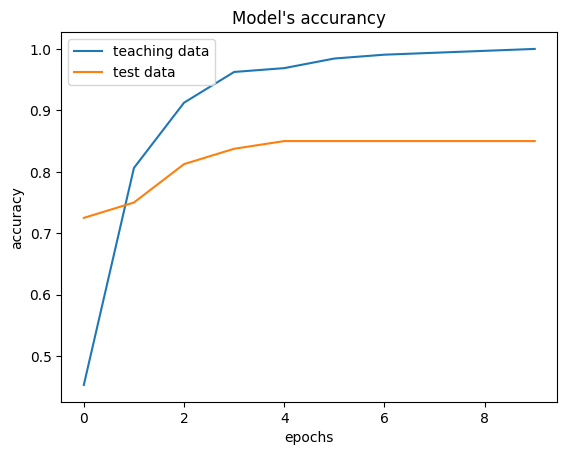

In [64]:
plot_history_of_accuracy(gram3_model_history)
plt.savefig('accurancy_model1.png')

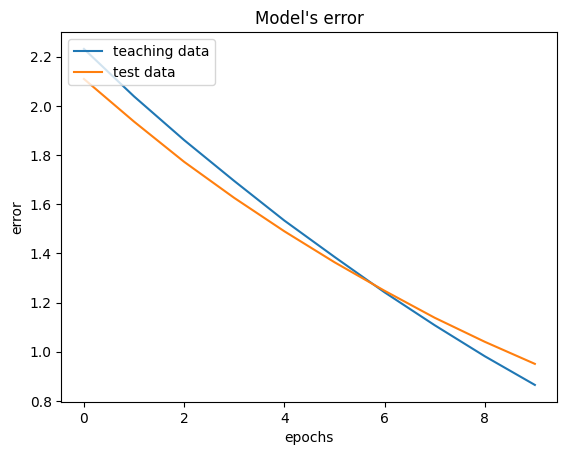

In [65]:
plot_history_of_loss(gram3_model_history)
plt.savefig('loss_model1.png')

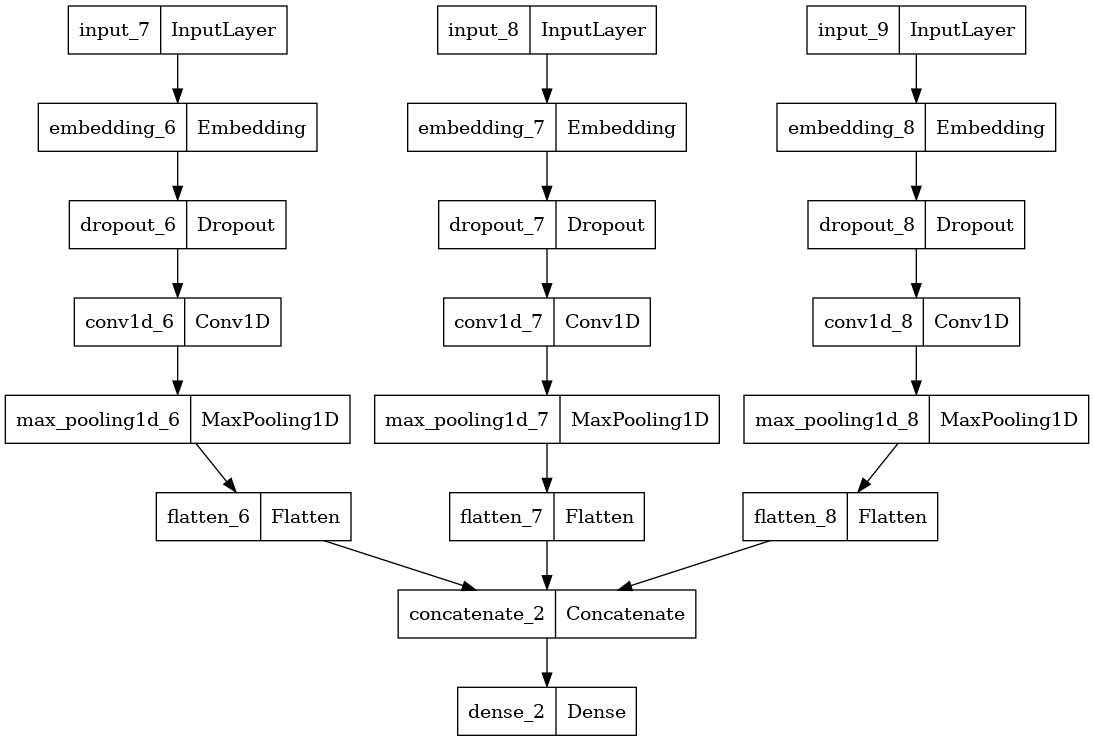

In [66]:
keras.utils.plot_model(gram3_model, 'gram3_model1_arh.png')

In [67]:
accuracy_list = []
prec_list = []
recall_list = []
f1_list = []

for i in range(10):
    author_pred3 = np.random.choice(authors_names, len(author_test))

    accuracy = accuracy_score(author_test, author_pred3)
    precision, recall, f1, support = score(author_test, author_pred3)
    ave_precision = np.average(precision, weights = support/np.sum(support))
    ave_recall = np.average(recall, weights = support/np.sum(support))
    ave_f1 = np.average(f1, weights = support/np.sum(support))
    
    accuracy_list.append(accuracy)
    prec_list.append(ave_precision)
    recall_list.append(ave_recall)
    f1_list.append(ave_f1)

print('Accurancy:', accuracy_list, np.mean(accuracy_list), np.std(accuracy_list))
print('Average Precision:', prec_list, np.mean(prec_list), np.std(prec_list))
print('Average Recall:', recall_list, np.mean(recall_list), np.std(recall_list))
print('Average F1 Score:', f1_list, np.mean(f1_list), np.std(f1_list))

Accurancy: [0.08, 0.07, 0.14, 0.13, 0.08, 0.05, 0.1, 0.14, 0.19, 0.1] 0.10800000000000001 0.039698866482558416
Average Precision: [0.08294444444444443, 0.06319362745098038, 0.16385317460317458, 0.13628282828282826, 0.08578968253968253, 0.05783333333333333, 0.10216161616161613, 0.1359047619047619, 0.18811721611721605, 0.10042857142857141] 0.11165092562666087 0.04089064043609107
Average Recall: [0.07999999999999999, 0.06999999999999999, 0.13999999999999999, 0.12999999999999998, 0.07999999999999997, 0.04999999999999999, 0.09999999999999998, 0.13999999999999996, 0.18999999999999997, 0.09999999999999996] 0.10799999999999996 0.03969886648255841
Average F1 Score: [0.07728281948230796, 0.06135997988939164, 0.14181003438612808, 0.12890114174324696, 0.08058295136236313, 0.05201574175205006, 0.09911702332754961, 0.13671326442042134, 0.18759365473236436, 0.09918767507002799] 0.10645642861658511 0.039846059002388405


In [68]:
# prediction test

for i in range(50): 
    print('Sentence', i, '- Right answer =', author_test[i],  'Model\'s 1 predict =', author_pred1[i], 
         'Model\'s 2 predict =', author_pred3[i]) 
    print(text_test[i], '\n')


Sentence 0 - Right answer = AlisonCassidy Model's 1 predict = JohnDryden Model's 2 predict = PeterSQuinn
with smiles and giggles and games of pretending 

Sentence 1 - Right answer = PeterSQuinn Model's 1 predict = PeterSQuinn Model's 2 predict = DeboraShort
through pigmented airy dreams 

Sentence 2 - Right answer = AnnaAkhmatova Model's 1 predict = AnnaAkhmatova Model's 2 predict = ErnestineNorthover
i smoldering on a slow fire 

Sentence 3 - Right answer = ErnestineNorthover Model's 1 predict = ErnestineNorthover Model's 2 predict = SaraTeasdale
when memories flow and scenes are set 

Sentence 4 - Right answer = AnnaAkhmatova Model's 1 predict = AnnaAkhmatova Model's 2 predict = AnnaAkhmatova
and stayed with her alone now youre gone and nobody says a word 

Sentence 5 - Right answer = DeboraShort Model's 1 predict = DeboraShort Model's 2 predict = SaraTeasdale
that prepares your scrumptious wild rice tonight 

Sentence 6 - Right answer = ErnestineNorthover Model's 1 predict = Ernest

# The end of notebook 